# Saurabh Kumar | ESET0128  |   Advance Python AIML DAY:19

## Day19_Task1

In [ ]:
# Task1 - Regression Techniques

# 1. Load a dataset (e.g., Boston Housing or any housing dataset) and build a simple linear regression model to predict house prices based on one independent variable (e.g., square footage).

# 2. Plot the regression line and interpret the slope.

# 3. Use multiple linear regression on the same dataset to include additional features like number of rooms and age of the house.

# 4. Evaluate model performance using R² and RMSE.

# 5. Compare the performance of simple vs multiple regression models and explain which performs better and why.


## Linear Regression with one independent variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('/content/housing.csv')

In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [9]:
data=data.dropna()

In [10]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [15]:
data=data.select_dtypes(exclude='object')

In [16]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [17]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Axes: >

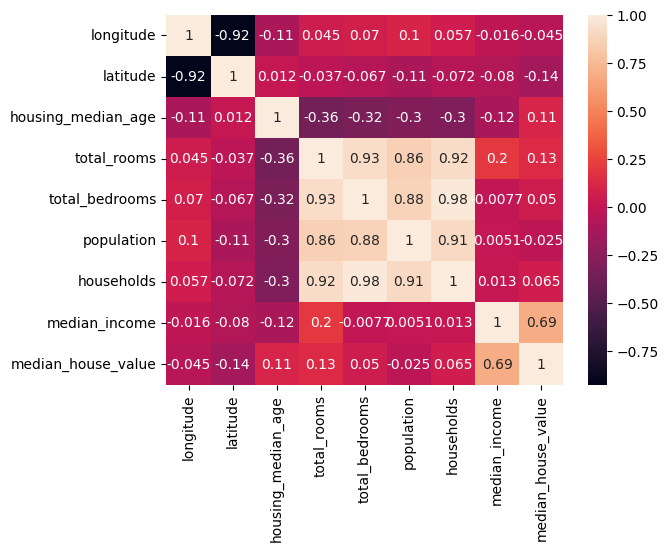

In [18]:
sns.heatmap(data.corr(),annot=True)

In [23]:
data1=data[['median_income','median_house_value']]

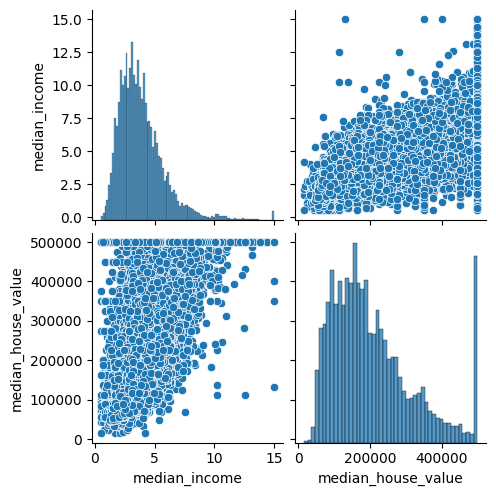

In [54]:
sns.pairplot(data1)

<Axes: >

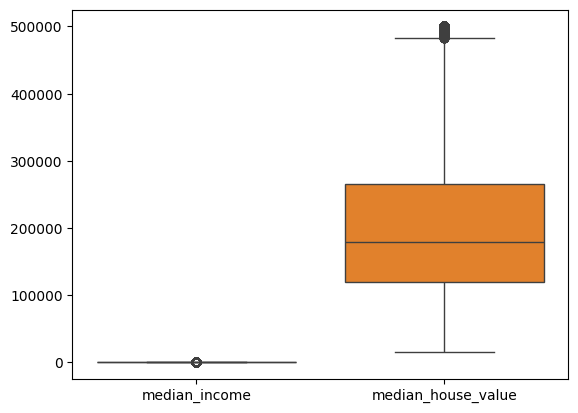

In [46]:
sns.boxplot(data1)

In [24]:
data1.head()

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0


In [27]:
x=data1['median_income']
y=data1['median_house_value']

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [36]:
pred=lr.predict(x_test.values.reshape(-1, 1))

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Training Metrics [single featured] :")
print('MAE:',mean_absolute_error(y_train,lr.predict(x_train.values.reshape(-1, 1))))
print('MSE:',mean_squared_error(y_train,lr.predict(x_train.values.reshape(-1, 1))))
print('RMSE:',np.sqrt(mean_squared_error(y_train,lr.predict(x_train.values.reshape(-1, 1)))))
print('R2_score:',r2_score(y_train,lr.predict(x_train.values.reshape(-1, 1))))


print("\nTesting Metrics [single featured] :")
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score:',r2_score(y_test,pred))

Training Metrics:
MAE: 62368.91172051588
MSE: 6958618210.4815235
RMSE: 83418.33258032387
R2_score: 0.47430066366395796

Testing Metrics:
MAE: 63374.551304332555
MSE: 7221011204.235033
RMSE: 84976.53325615863
R2_score: 0.47196228574894983


Intercept of slope: 45035.22817538006
Slope: [41751.95797205]


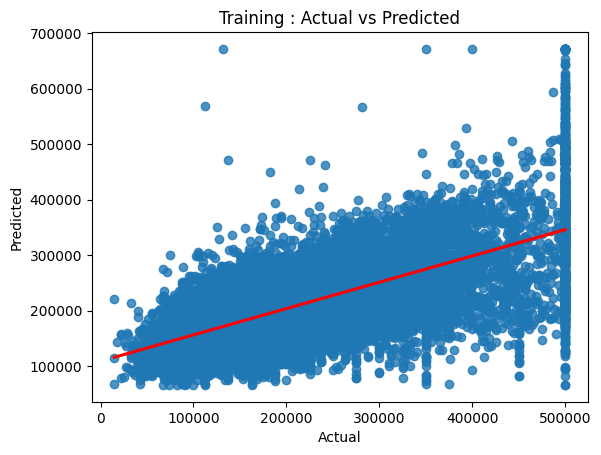

In [56]:
sns.regplot(x=y_train, y=lr.predict(x_train.values.reshape(-1, 1)), line_kws={'color':'red'})
plt.title('Training : Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Intercept of slope: 45035.22817538006
Slope: [41751.95797205]


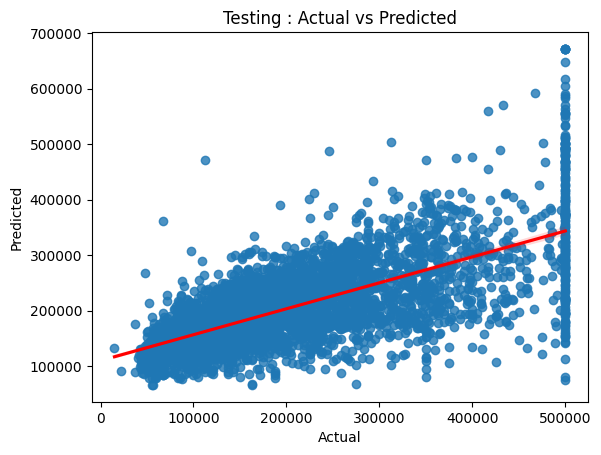

In [57]:
sns.regplot(x=y_test, y=pred, line_kws={'color':'red'})
plt.title('Testing : Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
print("Intercept of slope:",lr.intercept_)
print("Slope:",lr.coef_)

## Linear Regression with multiple independent variable (multiple features)

In [59]:
# From above heatmap we can see the correlation of features.
# Longitute and Latitute feature are showing very minimal effect on housing price. so we can remove those from features.

data=data.drop(['longitude','latitude'],axis=1)

In [60]:
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


<Axes: >

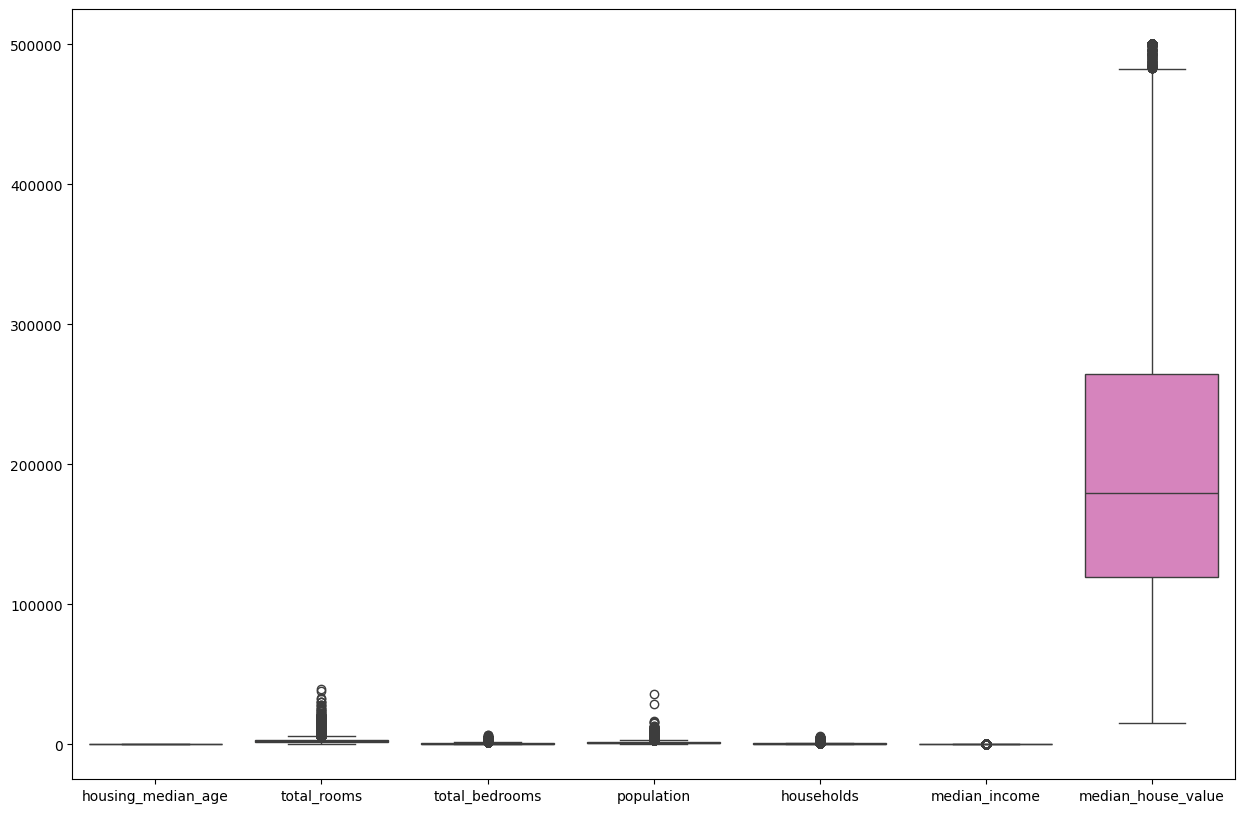

In [66]:
plt.figure(figsize=(15,10))
sns.boxplot(data)

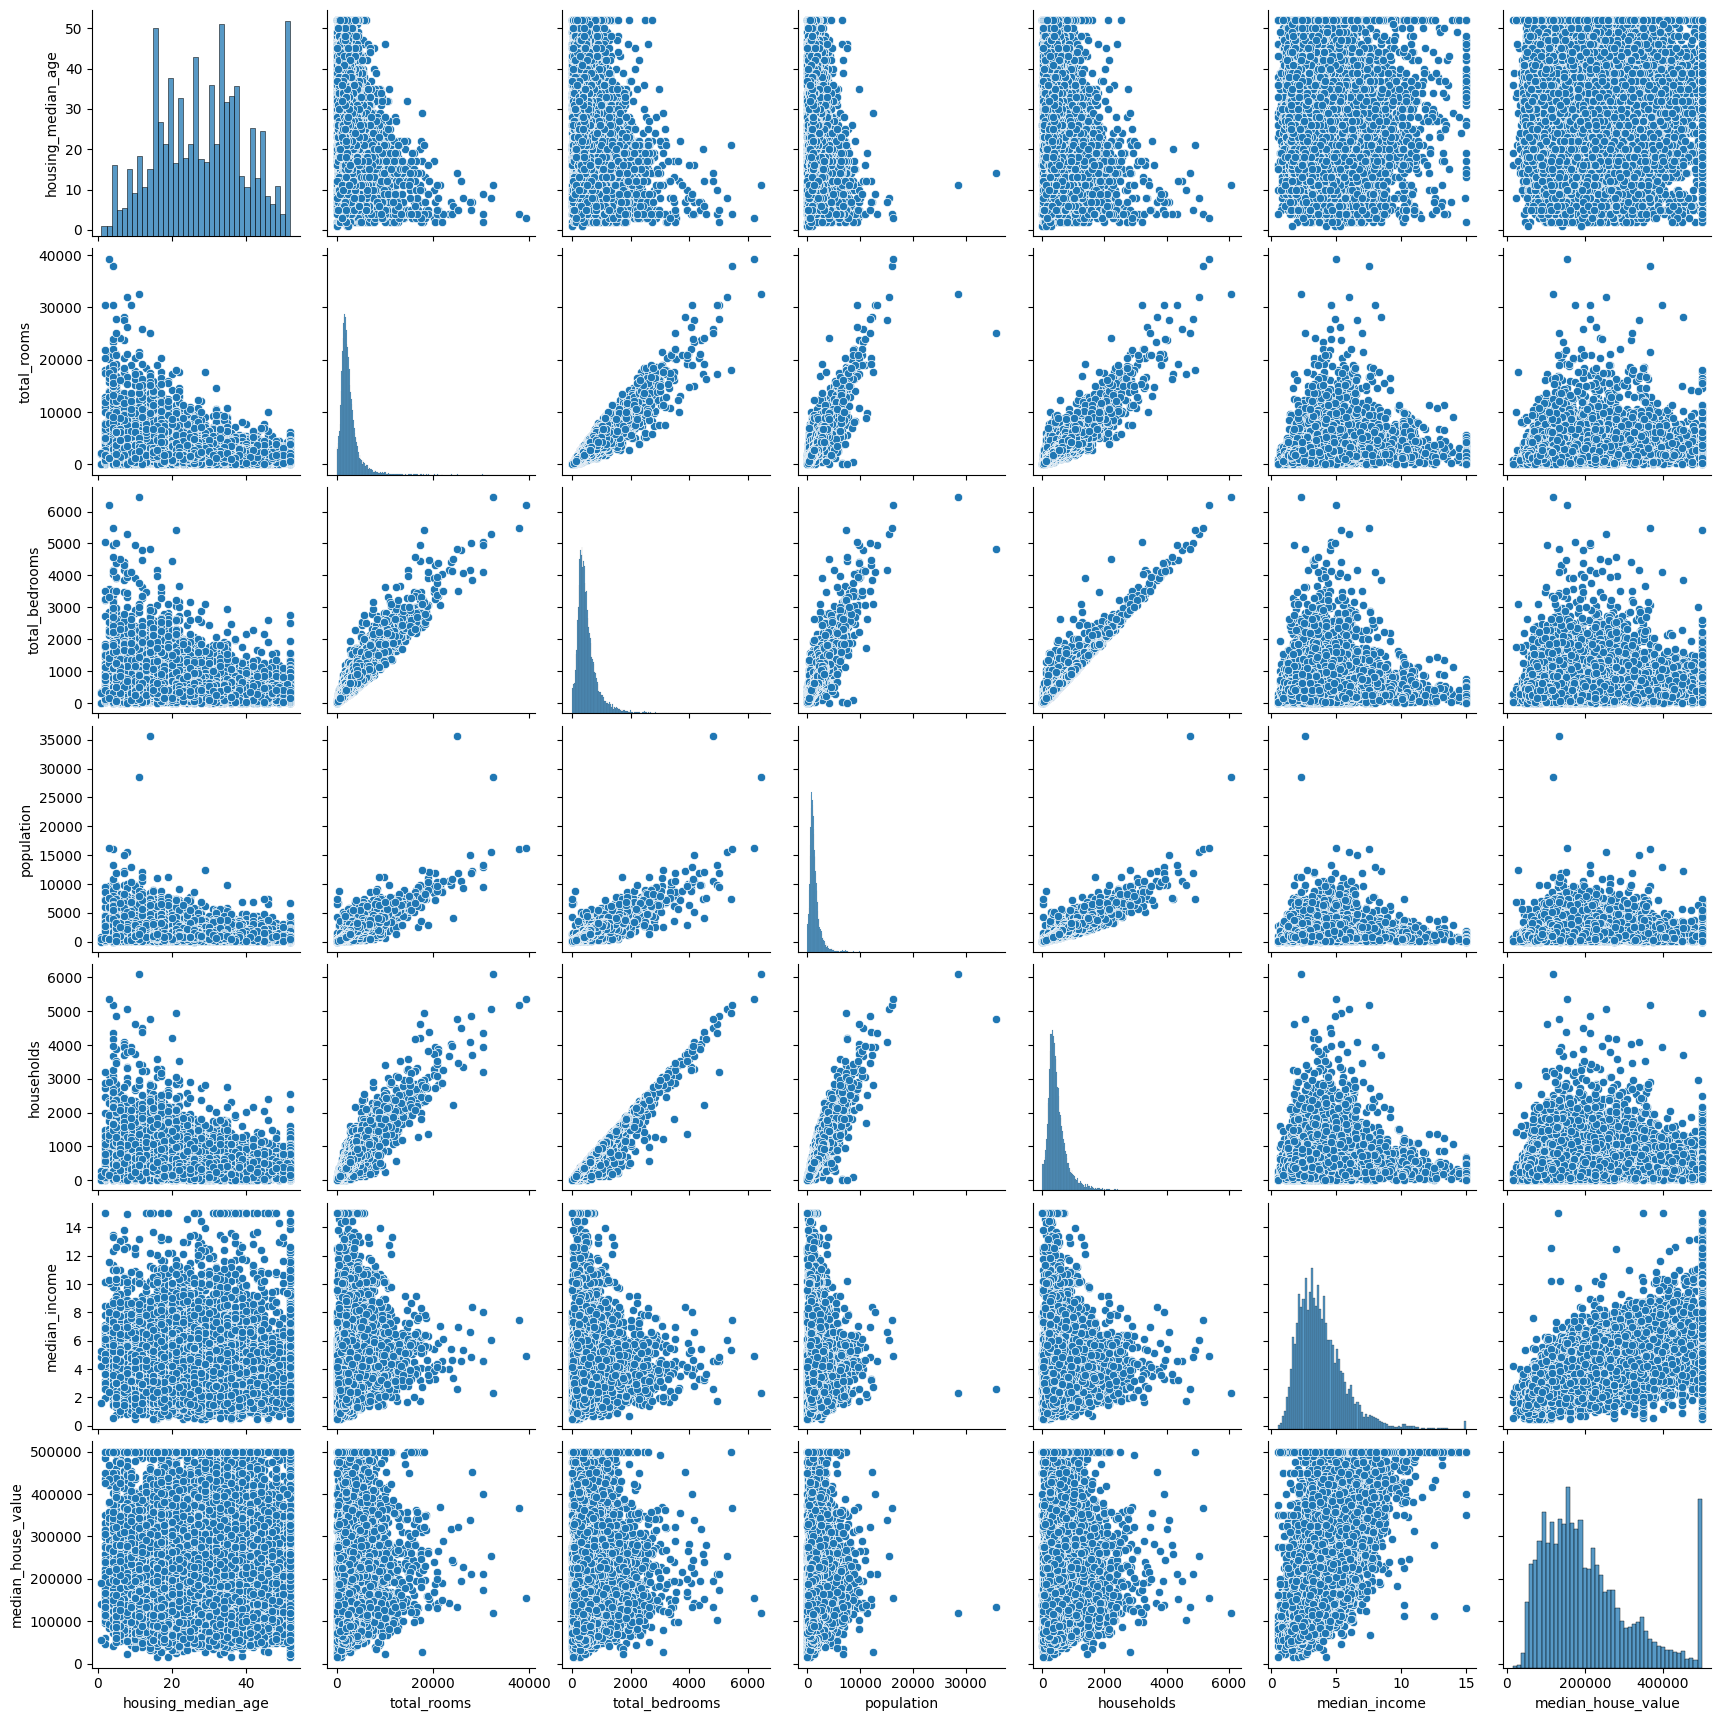

In [64]:
sns.pairplot(data)

In [61]:
xx=data.drop('median_house_value',axis=1)
yy=data['median_house_value']

In [62]:
xx_train,xx_test, yy_train, yy_test = train_test_split(xx,yy,test_size=0.2,random_state=42)

In [63]:
mlr=LinearRegression()
mlr.fit(xx_train,yy_train)

LinearRegression()

In [67]:
pred_mlr=mlr.predict(xx_test)

In [71]:

print("Training Metrics [multiple featured] :")
print('MAE:',mean_absolute_error(yy_train,mlr.predict(xx_train)))
print('MSE:',mean_squared_error(yy_train,mlr.predict(xx_train)))
print('RMSE:',np.sqrt(mean_squared_error(yy_train,mlr.predict(xx_train))))
print('R2_score:',r2_score(yy_train,mlr.predict(xx_train)))


print("\nTesting Metrics [multiple featured] :")
print('MAE:',mean_absolute_error(yy_test,pred_mlr))
print('MSE:',mean_squared_error(yy_test,pred_mlr))
print('RMSE:',np.sqrt(mean_squared_error(yy_test,pred_mlr)))
print('R2_score:',r2_score(yy_test,pred_mlr))

Training Metrics [multiple featured] :
MAE: 55650.973895545096
MSE: 5750782268.404667
RMSE: 75833.91239020092
R2_score: 0.5655484565370036

Testing Metrics [multiple featured] :
MAE: 56642.49929908636
MSE: 5865619646.959267
RMSE: 76587.3334629119
R2_score: 0.5710755317440979


Text(0, 0.5, 'Predicted')

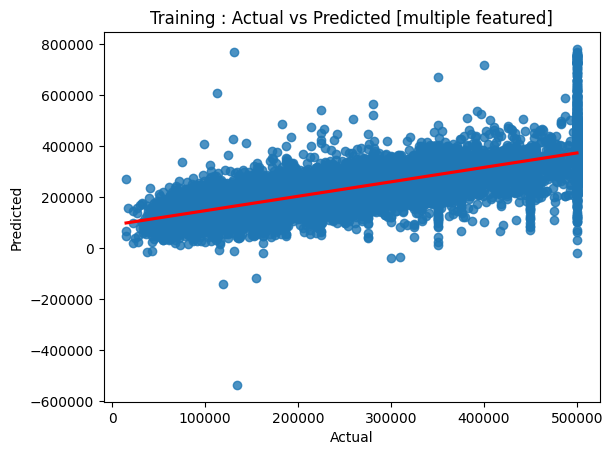

In [72]:
sns.regplot(x=yy_train, y=mlr.predict(xx_train), line_kws={'color':'red'})
plt.title('Training : Actual vs Predicted [multiple featured]')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Intercept of slope [multiple featured]: -45966.34532491994
Slope [multiple featured]: [ 1.88090465e+03 -1.98859259e+01  1.04980255e+02 -3.36259707e+01
  1.16315000e+02  4.76989661e+04]


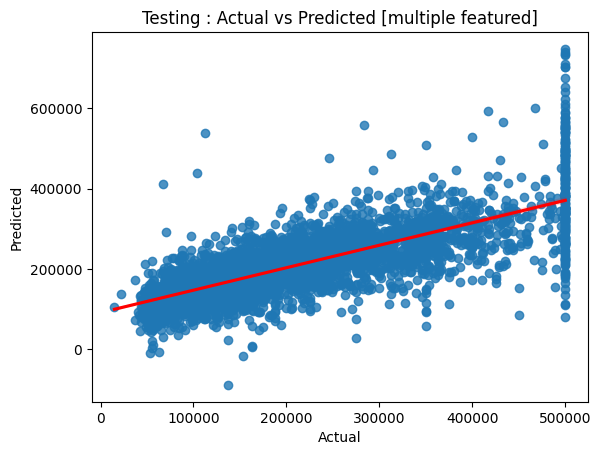

In [73]:
sns.regplot(x=yy_test, y=pred_mlr, line_kws={'color':'red'})
plt.title('Testing : Actual vs Predicted [multiple featured]')
plt.xlabel('Actual')
plt.ylabel('Predicted')
print("Intercept of slope [multiple featured]:",mlr.intercept_)
print("Slope [multiple featured]:",mlr.coef_)

In [195]:
print("=============================================================================================================================")
print("      \t\t\tSingle Feature \t\t\t \t|\t\t\t Multiple Feature")
print("-----------------------------------------------------------------------------------------------------------------------------")
print("      \tTraining Metrics   \t\t   Testing Metric  \t|      Training Metrics   \t\t   Testing Metric")
print("=============================================================================================================================")
print(f"MAE:\t{mean_absolute_error(y_train,lr.predict(x_train.values.reshape(-1, 1)))}   \t\t   {mean_absolute_error(y_test,pred)}  \t|      {mean_absolute_error(yy_train,mlr.predict(xx_train))}   \t\t   {mean_absolute_error(yy_test,pred_mlr)}")
print("-----------------------------------------------------------------------------------------------------------------------------")
print(f"MSE:\t{mean_squared_error(y_train,lr.predict(x_train.values.reshape(-1, 1)))}   \t\t   {mean_squared_error(y_test,pred)}  \t|      {mean_squared_error(yy_train,mlr.predict(xx_train))}   \t\t   {mean_squared_error(yy_test,pred_mlr)}")
print("-----------------------------------------------------------------------------------------------------------------------------")
print(f"RMSE:\t{np.sqrt(mean_squared_error(y_train,lr.predict(x_train.values.reshape(-1, 1))))}   \t\t   {np.sqrt(mean_squared_error(y_test,pred))}  \t|      {np.sqrt(mean_squared_error(yy_train,mlr.predict(xx_train)))}   \t\t   {np.sqrt(mean_squared_error(yy_test,pred_mlr))}")
print("-----------------------------------------------------------------------------------------------------------------------------")
print(f"R2: \t{r2_score(y_train,lr.predict(x_train.values.reshape(-1, 1)))}   \t\t   {r2_score(y_test,pred)} \t|      {r2_score(yy_train,mlr.predict(xx_train))}   \t\t   {r2_score(yy_test,pred_mlr)}")
print("=============================================================================================================================")

print("\nResult: There is 10% improvement in R2 Score when we are taking multiple features")



      			Single Feature 			 	|			 Multiple Feature
-----------------------------------------------------------------------------------------------------------------------------
      	Training Metrics   		   Testing Metric  	|      Training Metrics   		   Testing Metric
MAE:	62368.91172051588   		   63374.551304332555  	|      55650.973895545096   		   56642.49929908636
-----------------------------------------------------------------------------------------------------------------------------
MSE:	6958618210.4815235   		   7221011204.235033  	|      5750782268.404667   		   5865619646.959267
-----------------------------------------------------------------------------------------------------------------------------
RMSE:	83418.33258032387   		   84976.53325615863  	|      75833.91239020092   		   76587.3334629119
-----------------------------------------------------------------------------------------------------------------------------
R2: 	0.47430066366395796   		   0.47196228574894